In [1]:
# install package

if 'google.colab' in str(get_ipython()) :
    print('Download')
    !mkdir util; wget https://raw.githubusercontent.com/minireference/noBSLAnotebooks/master/util/plot_helpers.py -P util

Download
--2022-07-19 13:40:44--  https://raw.githubusercontent.com/minireference/noBSLAnotebooks/master/util/plot_helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8787 (8.6K) [text/plain]
Saving to: ‘util/plot_helpers.py’

plot_helpers.py     100%[===================>]   8.58K  --.-KB/s    in 0s      

2022-07-19 13:40:44 (60.4 MB/s) - ‘util/plot_helpers.py’ saved [8787/8787]



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
from util.plot_helpers import plot_vec, plot_vecs, autoscale_arrows



sy.init_printing()
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Matrix Operations

In [23]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

In [24]:
A.T                 # 벡터 횡백터 -> 종벡터 or 종벡터-> 횡백터 변환

array([[1, 3],
       [2, 4]])

In [7]:
A*B             # 각 대칭 요소끼리 곱

array([[ 5, 12],
       [21, 32]])

In [16]:
print(type(A))

<class 'numpy.ndarray'>


In [8]:
A@B             #행렬 곱

array([[19, 22],
       [43, 50]])

In [9]:
import sympy as sy      # x_1, x_2 와 같은 기호(symbol) 사용 가능한 라이브러리

In [17]:
A = sy.Matrix([[3,4],[7,8]])
B = sy.Matrix([[5,3],[2,1]])

In [11]:
A*B         # numpy 의 array 와 다르게 각 요소 곱이 되지 않는다.

⎡23  13⎤
⎢      ⎥
⎣51  29⎦

In [18]:
print(type(A))

<class 'sympy.matrices.dense.MutableDenseMatrix'>


In [12]:
A@B

⎡23  13⎤
⎢      ⎥
⎣51  29⎦

In [19]:
# 계산에 사용할 기호(symbol)들을 아래와 같이 선언
x1,x2,y1,y2 = sy.symbols('x1, x2, y1, y2', real = True)

In [20]:
# 위 symbol들을 활용하여 np.array 와 유사한 방식으로 벡터 선언
x = sy.Matrix([x1,x2])
y = sy.Matrix([y1,y2])

In [22]:
x.T@y       # <변수>.T  => 횡백터=>종벡터 변환 (array에서도 동일하게 가능)

[x₁⋅y₁ + x₂⋅y₂]

In [26]:
a, b, c, d, e, f, g, h, i, j, k, l = sy.symbols('a, b, c, d, e, f, g, h, i, j, k, l', real = True)

A = sy.Matrix([[a, b], [c, d], [e, f]])
B = sy.Matrix([[g, h, i], [j, k, l]])
AB = A@B
AB

⎡a⋅g + b⋅j  a⋅h + b⋅k  a⋅i + b⋅l⎤
⎢                               ⎥
⎢c⋅g + d⋅j  c⋅h + d⋅k  c⋅i + d⋅l⎥
⎢                               ⎥
⎣e⋅g + f⋅j  e⋅h + f⋅k  e⋅i + f⋅l⎦

In [30]:
AB_tr = AB.transpose()          # 위에서 쓰인  .T 와 동일한 기능 함수
AB_tr

⎡a⋅g + b⋅j  c⋅g + d⋅j  e⋅g + f⋅j⎤
⎢                               ⎥
⎢a⋅h + b⋅k  c⋅h + d⋅k  e⋅h + f⋅k⎥
⎢                               ⎥
⎣a⋅i + b⋅l  c⋅i + d⋅l  e⋅i + f⋅l⎦

In [28]:
AB.T                    # 바로 위에처럼 .transpose() 함수와 동일 기능

⎡a⋅g + b⋅j  c⋅g + d⋅j  e⋅g + f⋅j⎤
⎢                               ⎥
⎢a⋅h + b⋅k  c⋅h + d⋅k  e⋅h + f⋅k⎥
⎢                               ⎥
⎣a⋅i + b⋅l  c⋅i + d⋅l  e⋅i + f⋅l⎦

In [31]:
B_tr_A_tr = B.transpose()@A.transpose()
AB_tr == B_tr_A_tr

True

#Linear System

### n=2일 때의 linear system

$$ x_1 + x_2 = 6 \\
x_1 - x_2 = -4 $$. 

> 두 linear equation을 plot한다면

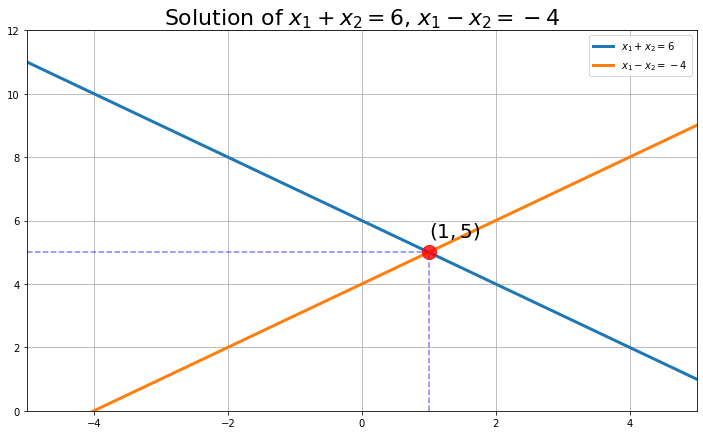

In [36]:
x1 = np.linspace(-5, 5, 100)
x2_1 = -x1 + 6
x2_2 = x1 + 4

fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(1, 5, s = 200, zorder=5, color = 'r', alpha = .8) 

ax.plot(x1, x2_1, lw =3, label = '$x_1+x_2=6$')
ax.plot(x1, x2_2, lw =3, label = '$x_1-x_2=-4$')
ax.plot([1, 1], [0, 5], ls = '--', color = 'b', alpha = .5)
ax.plot([-5, 1], [5, 5], ls = '--', color = 'b', alpha = .5)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 12])

ax.legend()
s = '$(1,5)$'
ax.text(1, 5.5, s, fontsize = 20)
ax.set_title('Solution of $x_1+x_2=6$, $x_1-x_2=-4$', size = 22)
ax.grid()

### n=3일 때의 linear system

$$ x_1 + 2x_2 + 3x_3 = 6 \\
2x_1 + 5x_2 + 2x_3 = 4 \\
6x_1 - 3x_2 + x_3 = 2 $$. 

> 세 linear equation을 plot한다면

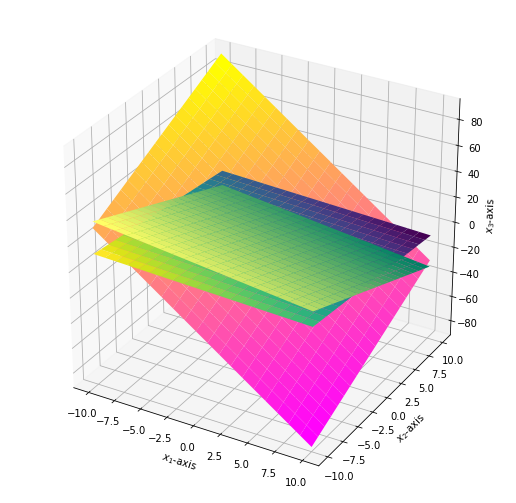

In [33]:
x1 = np.linspace(-10, 10, 20)
x2 = np.linspace(-10, 10, 20)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

X3_1 = (6 - 2*X2 - X1) * (1/3)
ax.plot_surface(X1, X2, X3_1, cmap ='viridis', alpha = 1) 

X3_2 = (4 - 5*X2 - 2*X1) * (1/2)
ax.plot_surface(X1, X2, X3_2, cmap ='summer', alpha = 1)

X3_3 = 2  + 3*X2 - 6*X1
ax.plot_surface(X1, X2, X3_3, cmap ='spring', alpha = 1)

ax.set_xlabel('$x_1$-axis')
ax.set_ylabel('$x_2$-axis')
ax.set_zlabel('$x_3$-axis')

plt.show()

> 이 나오게 됩니다. 따라서 n=2인 첫 번째 예시와 마찬가지로, 세 평면이 만나는 교점을 찾으면 주어진 세 linear equation을 만족하는 해가 됩니다. n=2일 경우보다 그림을 보고 직관적으로 해를 알기 어렵고, 연립방정식으로 해를 구하는 것도 상대적으로 복잡해졌음을 알 수 있습니다.


$$ Ax = b $$
$$ \begin{bmatrix}
1 & 2 & 3\\
2 & 5 & 2\\
6 & -3 & 1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
6\\
4\\
2
\end{bmatrix} $$

> 의 꼴로 생각할 수 있는데, 위의 두 plot은 이를 "row" (linear equation)를 중심으로 이들의 교점을 구하는 방식으로 접근했습니다. 이 방식과는 다르게, "column"들을 중심으로 생각해봅시다. 각 column을 vector로 생각하면 위 linear system은

$$ x_1\begin{bmatrix}
1\\
2\\
6
\end{bmatrix} + x_2\begin{bmatrix}
2\\
5\\
-3
\end{bmatrix} + x_3\begin{bmatrix}
3\\
2\\
1
\end{bmatrix} =  \begin{bmatrix}
6\\
4\\
2
\end{bmatrix}$$ 

> 로 분해할 수 있습니다 (Matrix multiplications as column combinations). 즉 이 경우 $x_1, x_2, x_3$은 각 column vector의 계수가 됩니다. 이를 plot한다면

column vectors: Matrix([[1], [2], [6]]) Matrix([[2], [5], [-3]]) Matrix([[3], [2], [1]])


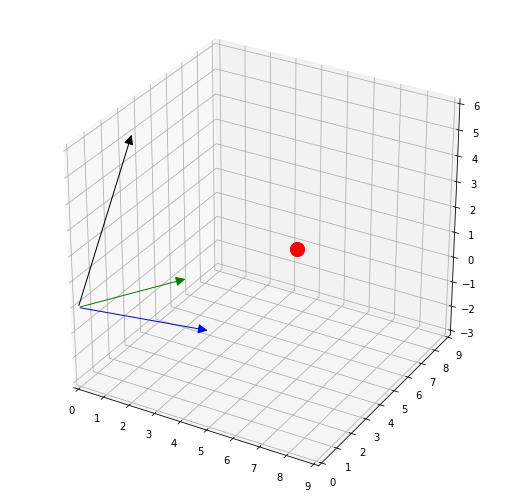

In [34]:
A = sy.Matrix([[1, 2, 3], [2, 5, 2], [6, -3, 1]])
x1, x2, x3 = sy.symbols('x1 x2 x3') 
x = sy.Matrix([x1,x2,x3])

print('column vectors:', A.col(0), A.col(1), A.col(2))

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(6, 4, 2, s = 200, color = 'red')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

즉, 세 column vector ([1,2,6], [3,2,1],[2,5,-3])를 linear combination 해서 b ([6,4,2]) 를 만드는 계수 $x_1,x_2,x_3$을 찾는 문제로 바뀌게 됨.

    |Row picture: 각 row (linear equation; $a_{i1}x_{1}+a_{i2}x_{2}+a_{i3}x_{3}+\cdots +a_{in}x_{n}=b_{i}$) 들의 교점을 찾는다.
    |Column picture: 각 column (vector; $[a_{1i}, a_{2i}, \cdots, a_{mi}]^T$) 들의 linear combination이 b가 되도록 하는 계수 $x_1, x_2, x_3$을 찾는다.


In [37]:
# 해 구하는 방법
from sympy.solvers.solveset import linsolve  # linsolve 라이브러리 이용

x1, x2, x3 = sy.symbols('x1 x2 x3')
A = sy.Matrix(((1,2,3),(2,5,2),(6,-3,1)))
b = sy.Matrix((6,4,2))

system = A,b  # 이와 같이 system을 정의합니다.
linsolve(system, x1, x2, x3)  # system, 그리고 x의 원소를 차례로 넣습니다.

### 해가 없는 경우의 linear system


$$ x_1 + x_2 + x_3 = 1 \\
x_1 - x_2 - 2x_3 = 2 \\
2x_1 - x_3 = 1 $$. 

구현

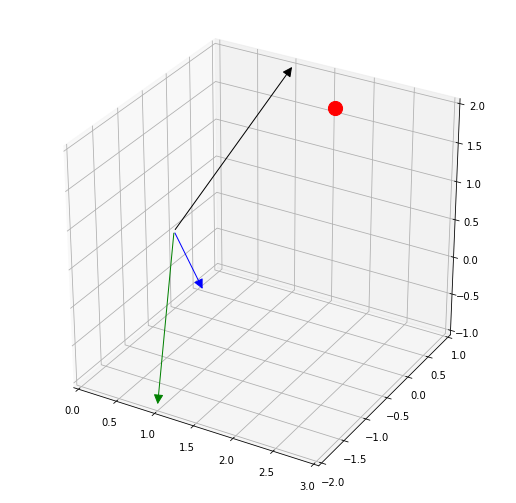

In [39]:
A = sy.Matrix([[1,1,1],[1,-1,-2],[2,0,-1]])
x1,x2,x3 = sy.symbols('x1, x2, x3')


fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(1,2,1, s = 200, color = 'red')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

In [42]:
# 해가 없는 경우
x1, x2, x3 = sy.symbols('x1 x2 x3')
A = sy.Matrix(((1,1,1),(1,-1,-2),(2,0,-1)))
b = sy.Matrix((1,2,1))

system = A,b
print(linsolve(system, x1, x2, x3))
linsolve(system, x1, x2, x3)

EmptySet


In [43]:
A.det()             # determinant 확인

### 해가 무수히 많은 경우의 linear system

$$ x_2 - x_3 = 4 \\
2x_1 + x_2 + 2x_3 = 4 \\
2x_1 + 2x_2 + x_3 = 8 $$. 

> 위 system을 행렬로 표현해보면

$$ Ax = b $$
$$ \begin{bmatrix}
0 & 1 & -1\\
2 & 1 & 2\\
2 & 2 & 1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
4\\
4\\
8
\end{bmatrix} $$

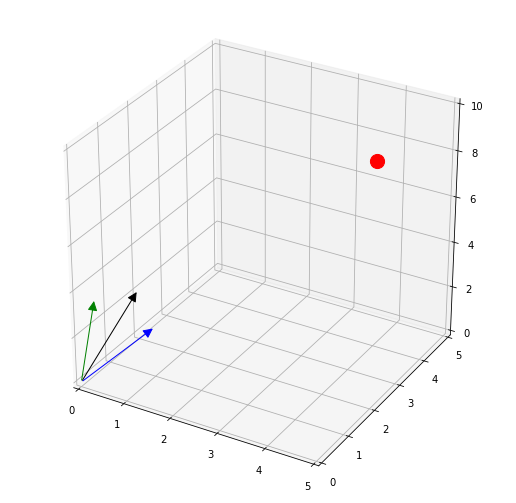

In [44]:
A = sy.Matrix([[0, 1, -1], [2, 1, 2], [2, 2, 1]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1,x2,x3])

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

ax.scatter(4,4,8, s = 200, color = 'red')                           # 위 식과 다르게 추가된 부분
ax.set(xlim = [0.,5.], ylim = [0.,5.,], zlim = [0., 10.])           

plt.show()

In [45]:
A = sy.Matrix(((0,1,-1),(2,1,2),(2,2,1)))
b = sy.Matrix((4,4,8))
system = A,b
linsolve(system, x1, x2, x3)

어떤 $x_3$의 값에 대해서도 위와 같은 형태의 vector는 해가 된다는 것입니다. 즉 ..., (-3/2, 5, 1) ($x_3$이 1일 경우), (-3, 6, 2) ($x_3$이 2일 경우), ..., (-3n/2, n+4, n), ... 모두가 해가 될 수 있다는 것이므로, 해가 무수히 많이 존재하는 경우입니다.

In [46]:
A.det()             # determinant 확인

# 4. Inverse matrix

> Square matrix $A$의 역행렬 $A^{-1}$은 다음과 같이 정의됩니다.

$$ A^{-1}A = AA^{-1} = I_n$$

> 역행렬이 존재한다는 의미는, input vector $x$와 output vector $Ax$ 사이에 일대일대응 관계가 성립한다는 의미입니다.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Bijection.svg/225px-Bijection.svg.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>


> 즉, $Ax$로부터 $x$를 복원할 수 있다는 말이고, 이를 복원하는 행렬이 $A^{-1}$이 됩니다. 

> 만약 $n \times n$ 행렬 $A$의 역행렬이 존재한다면, $Ax = b$는 $x = A^{-1}b$로 해를 구할 수 있습니다.

In [47]:
A = np.array([[1, 2, 3], [2, 5, 2], [6, -3, 1]])
b = np.array([6,4,2])

A_inv = np.linalg.inv(A)  # np.linalg.inv를 활용하면 A의 inverse를 구할 수 있습니다
A_inv_b = A_inv @ b  # A^{-1}b
x = A_inv_b  # x = A^{-1}b
print(x)

# 검산해봅시다 (구한 x를 대입)
print(A@x)
print(b)

[0. 0. 2.]
[6. 4. 2.]
[6 4 2]


# 5. Linear combination (선형 결합)

두 vector $ \begin{bmatrix} 4 \\ 2 \end{bmatrix}   $, $ \begin{bmatrix} -2 \\ 2 \end{bmatrix} $의 linear combination은 다음과 같이 나타낼 수 있습니다.

$$ c_1\begin{bmatrix} 4 \\ 2 \end{bmatrix} + c_2\begin{bmatrix} -2 \\ 2 \end{bmatrix} $$

Vector들과 상수의 곱이 나열되어 합으로 계산되는 형식

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

vec = np.array([[[0,0,4,2]],
                 [[0,0,-2,2]],
                 [[0,0,2,10]],
                 [[0,0,8,4]], 
                 [[0,0,-6,6]]])
colors = ['b','b','r','b','b']

# tail이 origin, head가 (4,2), (-2,2), (2,10), (8,4), (-6,6)인 vector plot
for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = colors[i], scale=1, alpha = .6)
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

# tail이 (8,4), head가 (2,10)인 vector plot
points12 = np.array([[8,4],[2,10]])
ax.plot(points12[:,0], points12[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

# tail이 (-6,6), head가 (2,10)인 vector plot
points34 = np.array([[-6, 6],[2,10]])
ax.plot(points34[:,0], points34[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.set_xlim([-10, 10])
ax.set_ylim([0, 10.5])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

######################################Basis########################################
a = np.arange(-11, 20, 1)
x = np.arange(-11, 20, 1)

# 붉은색 격자 plot
for i in a:    
    y1 = i + 0.5*x  # 0.5(기울기) = 2/4
    ax.plot(x, y1, ls = '--', color = 'pink', lw = 2)
    y2 = i - x  # -1(기울기) = 2/(-2)
    ax.plot(x, y2, ls = '--', color = 'pink', lw = 2)    

ax.set_title('Linear Combination of Two Vectors in $\mathbf{R}^2$', size = 22, x =0.5, y = 1.01)
plt.show()

# Reference

1. https://en.wikipedia.org/wiki/Bijection,_injection_and_surjection
2. http://aikorea.org/cs231n/python-numpy-tutorial/#matplotlib
3. https://github.com/MacroAnalyst/Linear_Algebra_With_Python


추가로 참조하여 공부해보자